In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
df = pd.read_csv('data_mers.csv')
#df['Date of symptoms onset'] = pd.to_datetime(df['Date of symptoms onset'], format='%d/%m/%Y')#.astype('datetime64[D]').dtype
#df['Date of laboratory confirmation'] = pd.to_datetime(df['Date of laboratory confirmation'], format='%d/%m/%Y')#.astype('datetime64[D]').dtype
df.head()

,Case No.,IncP_min,IncP_max,Age,Sex_status,Missing_exposure,Death_status,Onset_confirm
0,2,0,15,63,0,0,0,1.0
1,3,4,4,76,1,0,1,1.0
2,4,9,9,46,0,0,0,1.0
3,5,8,8,50,1,0,0,1.0
4,6,7,9,71,1,0,1,4.0


In [3]:
df.dropna(subset=['Onset_confirm'], inplace=True)
df.drop(columns = ['Case No.','Missing_exposure'], inplace=True)
df['Onset_confirm'] = df['Onset_confirm'].astype("int")
df.describe()

,IncP_min,IncP_max,Age,Sex_status,Death_status,Onset_confirm
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,5.787611,8.433628,54.699115,0.592920,0.230088,5.469027
std,3.315147,4.611469,15.836150,0.493478,0.422764,3.674407
min,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,45.000000,0.000000,0.000000,2.000000
50%,5.000000,8.000000,56.000000,1.000000,0.000000,5.000000
75%,8.000000,10.000000,65.000000,1.000000,0.000000,8.000000
max,15.000000,27.000000,84.000000,1.000000,1.000000,16.000000


In [4]:
y = df['Death_status']
x = df.loc[:,(df.columns != 'Death_status')]
print(x.head())
#x = df0['onsettohospital']
np.asarray(y)
model = sm.Logit(y,x)

#sm.GLM(y, x.astype('int'),family=sm.families.Binomial())

   IncP_min  IncP_max  Age  Sex_status  Onset_confirm
0         0        15   63           0              1
1         4         4   76           1              1
2         9         9   46           0              1
3         8         8   50           1              1
4         7         9   71           1              4


In [5]:
model_fit = model.fit()
model_fit.summary()

Optimization terminated successfully.
         Current function value: 0.451797
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Death_status   No. Observations:                  113
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Apr 2021   Pseudo R-squ.:                  0.1624
Time:                        15:00:50   Log-Likelihood:                -51.053
converged:                       True   LL-Null:                       -60.950
Covariance Type:            nonrobust   LLR p-value:                 0.0005483
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
IncP_min         -0.0999      0.094     -1.058      0.290      -0.285       0.085
IncP_max         -0.2191      0.081     -2.721      0.007      -0.377      -0.061
Age               0.0416      0.013      3.262      0.001       0.017       0.067
Sex_status        0.0451      0.480      0.094      0.925      -0.896       0.986
Onset_confirm    -0.2411      0.074     -3.248      0.001      -0.387      -0.096
=================================================================================
"""


Partial Leverage (or Partial Regression, or Added-Variable) Plots:


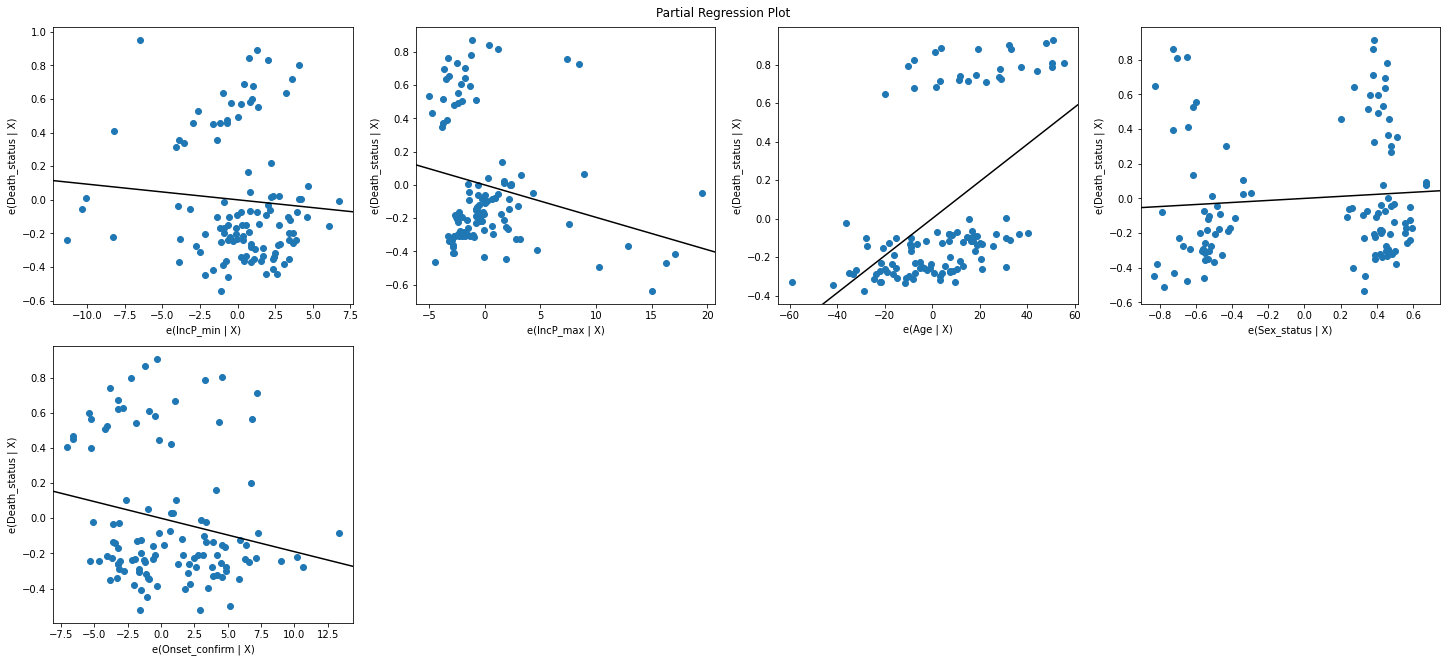

In [50]:
y_pred = model_fit.predict(x)
from statsmodels.graphics.regressionplots import plot_partregress_grid
import math
#includes intercept; 4 plots to a row:
nr = math.ceil((4 + 1) / 4) #number of rows of plots
plt.rcParams["figure.figsize"] = (20.2, 14 / 3 * nr) #plot height depends on number of rows of plots
print('\nPartial Leverage (or Partial Regression, or Added-Variable) Plots:')
#grid(rows, columns) for plots; fixed at 4 columns of plots per row:
plot_partregress_grid(model_fit, grid=(nr, 4))
plt.show()

## Binning by age 

In [102]:
cut_labels = ['below 55', '55 and above']
cut_bins = [0,54,100]
df['age_bin'] = pd.cut(df['Age'], bins=cut_bins, labels=cut_labels)
df.head()

,IncP_min,IncP_max,Age,Sex_status,Death_status,Onset_confirm,age_bin
0,0,15,63,0,0,1,55 and above
1,4,4,76,1,1,1,55 and above
2,9,9,46,0,0,1,below 55
3,8,8,50,1,0,1,below 55
4,7,9,71,1,1,4,55 and above


In [103]:
df1 = pd.get_dummies(df['age_bin'],prefix='age')

In [104]:
df0 = pd.concat([df,df1],axis=1)

In [105]:
df0.head(100)

,IncP_min,IncP_max,Age,Sex_status,Death_status,Onset_confirm,age_bin,age_below 55,age_55 and above
0,0,15,63,0,0,1,55 and above,0,1
1,4,4,76,1,1,1,55 and above,0,1
2,9,9,46,0,0,1,below 55,1,0
3,8,8,50,1,0,1,below 55,1,0
4,7,9,71,1,1,4,55 and above,0,1
...,...,...,...,...,...,...,...,...,...
100,8,10,60,0,0,2,55 and above,0,1
101,0,21,64,0,0,3,55 and above,0,1
104,5,5,57,0,0,8,55 and above,0,1
105,8,8,43,0,0,6,below 55,1,0


In [106]:
df0.drop(columns=['Age', 'age_bin','age_below 55'],inplace=True)
df0.head()

,IncP_min,IncP_max,Sex_status,Death_status,Onset_confirm,age_55 and above
0,0,15,0,0,1,1
1,4,4,1,1,1,1
2,9,9,0,0,1,0
3,8,8,1,0,1,0
4,7,9,1,1,4,1


In [107]:
y = df0['Death_status']
x = df0.loc[:,(df0.columns != 'Death_status')]
print(x.head())
#x = df0['onsettohospital']
np.asarray(y)
model2 = sm.Logit(y,x)

#sm.GLM(y, x.astype('int'),family=sm.families.Binomial())

   IncP_min  IncP_max  Sex_status  Onset_confirm  age_55 and above
0         0        15           0              1                 1
1         4         4           1              1                 1
2         9         9           0              1                 0
3         8         8           1              1                 0
4         7         9           1              4                 1


In [108]:
model2_fit = model2.fit()
model2_fit.summary()

Optimization terminated successfully.
         Current function value: 0.442662
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Death_status   No. Observations:                  113
Model:                          Logit   Df Residuals:                      108
Method:                           MLE   Df Model:                            4
Date:                Thu, 08 Apr 2021   Pseudo R-squ.:                  0.1793
Time:                        12:42:45   Log-Likelihood:                -50.021
converged:                       True   LL-Null:                       -60.950
Covariance Type:            nonrobust   LLR p-value:                 0.0002138
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
IncP_min            -0.0950      0.091     -1.040      0.298      -0.274       0.084
IncP_max            -0.1640      0.069     -2.371      0.018      -0.299      -0.028
Sex_status           0.1992      0.473      0.422      0.673      -0.727       1.126
Onset_confirm       -0.1539      0.063     -2.443      0.015      -0.277      -0.030
age_55 and above     1.9771      0.569      3.473      0.001       0.861       3.093
====================================================================================
"""

# Interpretation of logistic regression


| Exogeneous variable  | Description                                                    |   |   |   |
|----------------------|----------------------------------------------------------------|---|---|---|
|     IncP_min         |     Minimum predicted time from exposure to onset, days        |   |   |   |
|     IncP_max         | Maximum predicted time from exposure to onset, days            |   |   |   |
|     Age              |     Age of patient, years                                      |   |   |   |
|     Sex_status       |     Gender of patient, with 1 being male and 0 being female    |   |   |   |
|     Onset_confirm    |     Delay from onset to laboratory confirmation, days          |   |   |   |


|                      |     Odds ratio   (3sf)    |     p-value    |   |   |
|----------------------|---------------------------|----------------|---|---|
|     IncP_min         |     0.905                 |     0.290      |   |   |
|     IncP_max         |     0.803                 |     0.007      |   |   |
|     Age              |     1.04                  |     0.001      |   |   |
|     Sex_status       |     1.05                  |     0.925      |   |   |
|     Onset_confirm    |     0.786                 |     0.001      |   |   |

<font size="4">Exponent of the coefficient (e^coef) gives us the odds ratio of each variable when it comes to death status (i.e case fatality)</font>

<font size="4">Model suggests an odds ratio of 1.04 for each additional year of age, with a very small p-value of 0.001</font>

<font size="4">Another approach: binning age into categories. Greater risk to elderly, cut-off age of 55 was chosen by one analysis that also looked at South Korean Cases, with an odds ratio of 8.63</font>

<font size="4">Our new model with binned age gives a coefficient of 1.9771 for being aged 55 and above, equivalent to odds ratio of 7.22</font>

<font size="4">Differences: Paper used Cox-regression, dataset differences (missing data in ours) </font>

An article performing logistic regression on a similar dataset of South Korean MERS-CoV cases found an odds ratio of 1.12 for each additional year of age with a p-value of less than 0.001 (Majumder, Kluberg, Mekaru, & Brownstein, 2015). Another article that performed Cox-regression on the South Korean cases took the approach of a cut-off age, and found that being aged 55 and greater resulted in an odds ratio of 8.63 for death (Choi et al., 2016).
With this in mind, we decided to bin our data with the same threshold. When performing logistic regression with this binned age indicator as opposed to raw age value, the model produced a coefficient of 1.9771 for being aged 55 and above, equivalent to an odds ratio of 7.22 (3sf) with p-value equal to 0.001. The value we obtain is quite similar to the study conducted by Choi et al, and we find that this approach gives us a better idea of the odds ratio for the group we generally deem as ‘elderly’ as opposed to a odds ratio for every additional year of age.
## Implications
The greater risk elderly face as a result of MERS has numerous implications on our approach to tackling MERS, especially in the context of nosocomial infection.
Specialised measures could include increased surveillance and testing frequency of elderly patients in hospitals. This would increase the speed of detection and allow for medical care to be provided as soon as possible.
